<h1 align="center"><b>URBAN SOUNDS CLASSIFICATION</b></h1>


---
<p>Audio classification is one of the main topics covered in Audio Signal Processing which is a field of Deep Learning. In this notebook I classify urban sounds from <b><a href="https://urbansounddataset.weebly.com/urbansound8k.html">UrbanSound8k </a></b> dataset. The dataset consist of 10 classes which are: air conditioner, car horn, children playing, dog bark, drilling, engine idling, gun shot, jackhammer, siren, and street music.</p> 

<br>
<div align="center">
<table>
  <tr>
    <td> <p align="center">Air Conditioner</p> </td>
    <td><p align="center">Car Horn</p></td>
  </tr>
    <tr>
    <td> <p align="center">Children Playing</p> </td>
    <td><p align="center">Dog Bark</p></td>
  </tr>
    <tr>
    <td> <p align="center">Drilling</p> </td>
    <td><p align="center">Engine Idling</p></td>
  </tr>
    <tr>
    <td> <p align="center">Gun Shot</p> </td>
    <td><p align="center">Jackhammer</p></td>
  </tr>
    <tr>
    <td> <p align="center">Siren</p> </td>
    <td><p align="center">Street Music</p></td>
  </tr>
</table>
</div>
<br>

<p> I cover the notebook on the six step. Step 2 and 5 are optional. You can run step 2 if you want to extract the spectrogram yourself, or step 5 if you want to set hyperparameters. </p>

<p>⚠️ These hyperlinks will not work unless you are on Jupyter notebook, Google Colab or similar. </p>

<ol>
  <li><a href="#EDA">EDA</a></li>
      <ol type="a">
      <li><a href="#DATA VISUALIZATION">DATA VISUALIZATION</a></li>
    </ol>
  <li> <a href="#FEATURE EXTRACTION / SPECTROGRAM">FEATURE EXTRACTION / SPECTROGRAM (OPTIONAL)</a> </li>
  <li><a href="#PREPROCESS">PREPROCESS</a></li>
  <li><a href="#TRAIN - TEST SPLIT">TRAIN - TEST SPLIT</a></li>
  <li><a href="#OPTUNA - HYPERPARAMETER TUNING">OPTUNA - HYPERPARAMETER TUNING (OPTIONAL)</a></li>
      <ol type="a">
      <li><a href="#OPTUNA VISUALIZATION">OPTUNA VISUALIZATION</a></li>
    </ol>
  <li><a href="#COMPILE BEST MODEL">COMPILE BEST MODEL</a></li>
        <ol type="a">
      <li><a href="#VISUALIZE ARCHITECTURE">VISUALIZE ARCHITECTURE</a></li>
      <li><a href="#TEST THE MODEL">TEST THE MODEL</a></li>
      <li><a href="#CONFUSION MATRIX">CONFUSION MATRIX</a></li>
    </ol>
  <li><a href="#PREDICTION with TEST DATA">PREDICTION with TEST DATA</a></li>
</ol>


<a name="EDA"></a>
#**1. EDA** 

In [ ]:
import pandas as pd
import librosa
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D, Dense, Dropout, Flatten
from keras.layers import Flatten, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

import cv2

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Urban_Sound/metadata/UrbanSound8K.csv")
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [ ]:
audio_path = "/content/drive/MyDrive/Urban_Sound/audio/"
df['file_path'] = audio_path+'fold'+df.fold.astype(str)+'/'+df['slice_file_name']
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class,file_path
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark,/content/drive/MyDrive/Urban_Sound/audio/fold5...
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing,/content/drive/MyDrive/Urban_Sound/audio/fold5...
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn,/content/drive/MyDrive/Urban_Sound/audio/fold1...


In [ ]:
df.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
 8   file_path        8732 non-null   object 
dtypes: float64(2), int64(4), object(3)
memory usage: 614.1+ KB


In [ ]:
df.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
file_path          0
dtype: int64

In [ ]:
df['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

<a name="DATA VISUALIZATION"></a>
## **1.2. DATA VISUALIZATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


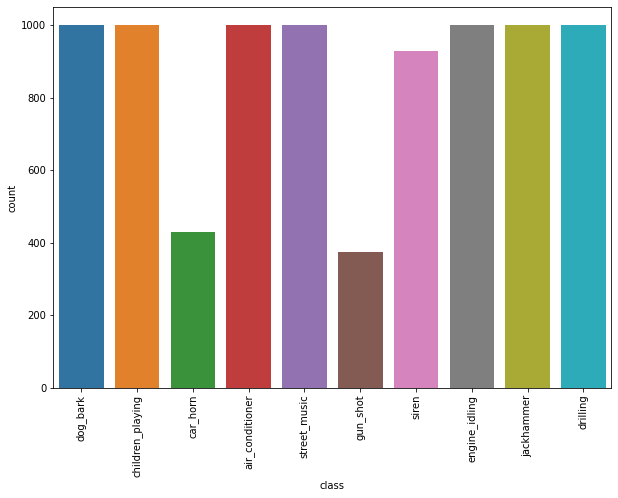

In [ ]:
fig = plt.figure(figsize=(10, 7))
sns.countplot("class", data=df)
plt.xticks(rotation=90)
plt.show()

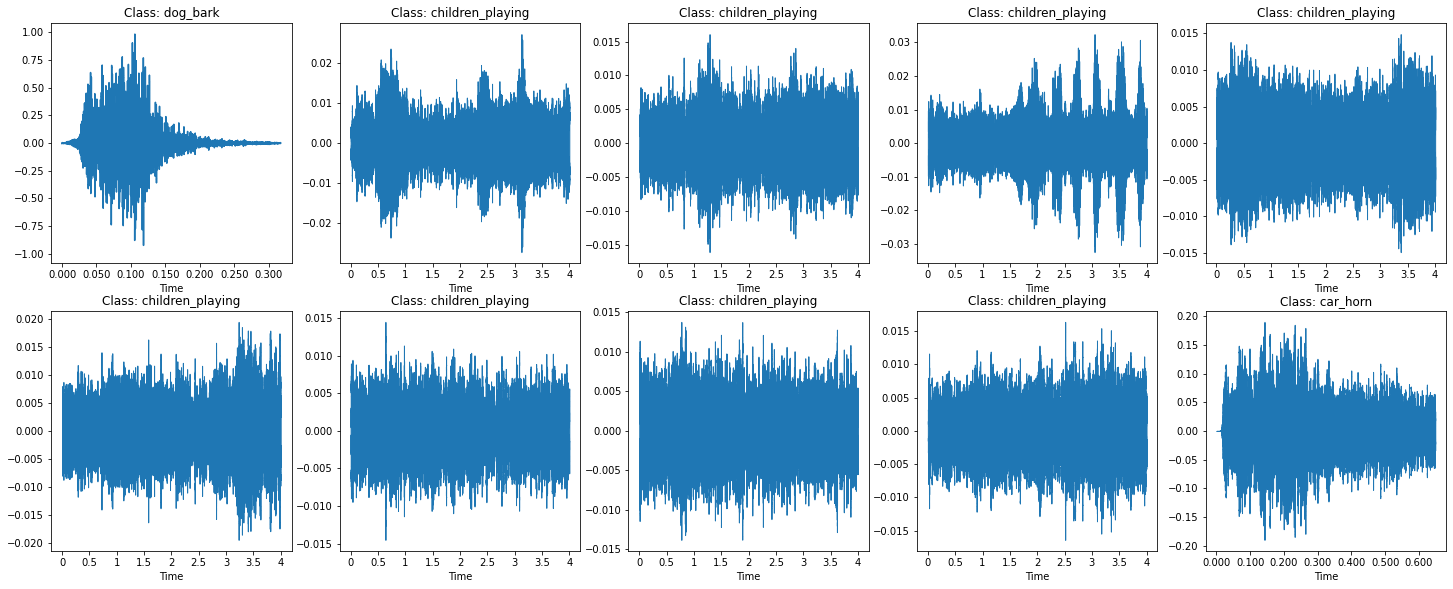

In [ ]:
import librosa.display
fig = plt.figure(figsize=(25, 15))
for i in range(10):
  x, sr = librosa.load(df["file_path"][i])
  plt.subplot(3,5,i+1)
  plt.title('Class: '+str(df['class'][i]))
  librosa.display.waveshow(x, sr=sr)

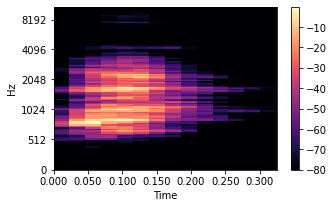

In [ ]:
x, sr = librosa.load("/content/drive/MyDrive/Urban_Sound/audio/fold5/100032-3-0-0.wav")
X=librosa.feature.melspectrogram(x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(X ,ref=np.max) #Genlikten Desibel değerine
plt.figure(figsize=(5,3))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="mel")
plt.colorbar()

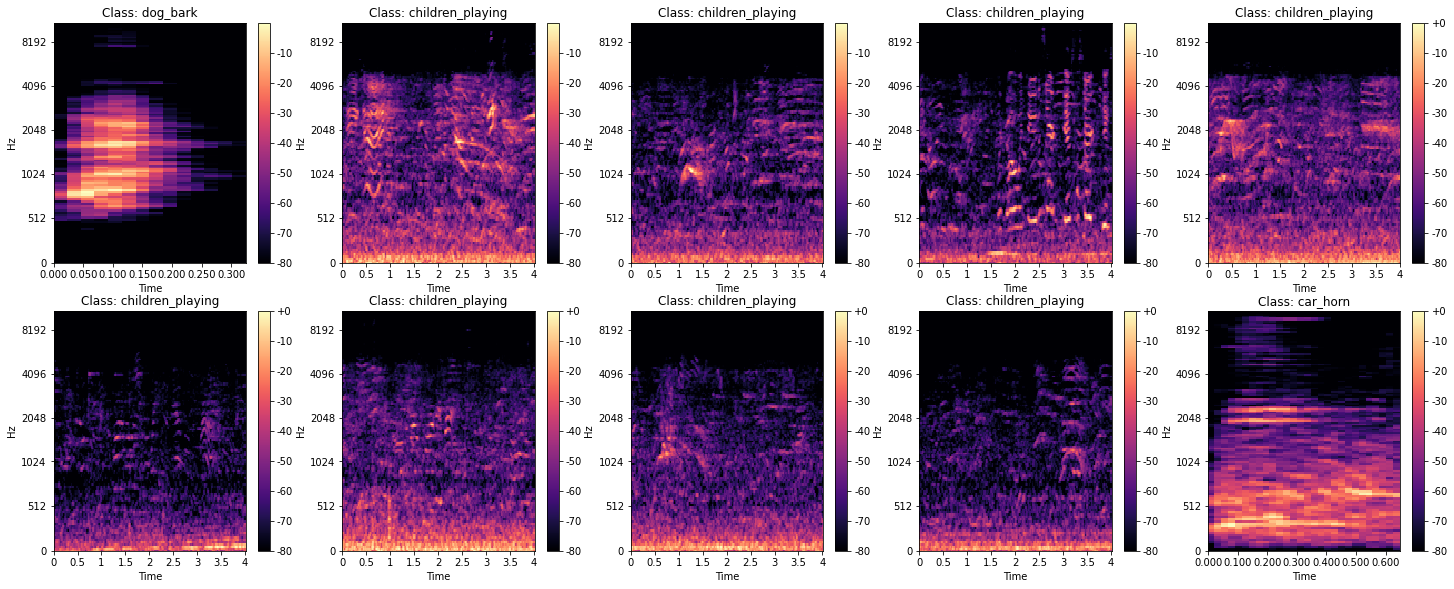

In [ ]:
fig = plt.figure(figsize=(25, 15))
for i in range(10):
  x, sr = librosa.load(df["file_path"][i])
  mel_spectrogram = librosa.feature.melspectrogram(x)
  log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
  plt.subplot(3,5,i+1)
  librosa.display.specshow(log_mel_spectrogram, 
                         x_axis="time",
                         y_axis="mel", 
                         sr=sr)
  plt.colorbar(format="%+2.f")
  plt.title('Class: '+str(df['class'][i]))

<a name="FEATURE EXTRACTION / SPECTROGRAM"></a>
#**2. FEATURE EXTRACTION / SPECTROGRAM (OPTIONAL)**

* Here I create folders where the extracted spectrogram images will be stored. 

In [ ]:
import os
path = "/content/drive/MyDrive/GAIH-Urban_sounds_classification/UrbanSound8k/images/"
def make_dir():
  for i in sorted(df["classID"].unique()):
    if os.path.exists(path + str(i)):
        print(f"{i}. folder already created")
    else:
        os.makedirs(path + str(i))
        print(f"{i}. folder created")

In [ ]:
make_dir()

0. folder created
1. folder created
2. folder created
3. folder created
4. folder created
5. folder created
6. folder created
7. folder created
8. folder created
9. folder created


* The code cell below is where the feature extraction is done. Thanks to the column (file_path) in the CSV, the audio files are accessed. Then from these audio files Librosa library extracts the spectrograms. Last, spectrograms are renamed before saving to the path.

* ⚠️ The extraction process takes <mark>a lot of time</mark> depending on your hardware. That's why I recommend using the ready-to-use image dataset which i loaded.

In [ ]:
for i in range(len(df.index)):
        path = "/content/drive/MyDrive/Urban_Sound/audio"
        x, sr = librosa.load(df["file_path"][i])
        mel_spectrogram = librosa.feature.melspectrogram(x)
        log_mel_spectrogram = librosa.amplitude_to_db(mel_spectrogram, ref=np.max)
        print(f"\r {i+1}. audio file.", end="")

        class_id = os.path.splitext(df["slice_file_name"][i])[0]
        class_id = class_id.split("-")
        plt.savefig(os.path.join(path + str(class_id[1]) + "/" + os.path.splitext(df["slice_file_name"][i])[0]))
        plt.close()

<a name="PREPROCESS"></a>
#**3. PREPROCESS**

* Preprocess is done with a basic function. In this function these process will be done: 
    <ul>
      <li>Resizing</li>
      <li>Normalization</li>
      <li>Separating data and its corresponding labels</li>
    </ul>

In [ ]:
train_dir = "/content/drive/MyDrive/Urban_Sound/images"

In [ ]:
def load_images(directory):
    images = []
    labels = []
    successed = 0
    fail = 0
    try:
      for idx, label in enumerate(uniq_labels):
          for file in os.listdir(directory + "/" + label):
              filepath = directory + "/" + label + "/" + file
              image = cv2.resize(cv2.imread(filepath), (64, 64))
              image = image/255
              images.append(image)
              labels.append(idx)
              print(f"\r File Name: {file} - Successed: {successed}", end="")
              successed +=1
      images = np.array(images)
      labels = np.array(labels)
    except:
      fail +=1
      print(fail)
    return(images, labels)

In [ ]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(directory = train_dir)

 File Name: 99710-9-0-5.png - Successed: 8731

<a name="TRAIN - TEST SPLIT"></a>
# **4. TRAIN - TEST SPLIT**

* Below we split the preprocessed data as train, test and validation data, they respectively 80%, 10% and 10%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, stratify = labels)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size = 0.11)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)
eval_n = len(X_eval)

print("Total number of classes: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)
print("Number of evaluation images: ", eval_n)

Total number of classes:  10
Number of training images:  6993
Number of testing images:  874
Number of evaluation images:  865


In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)
y_eval = keras.utils.np_utils.to_categorical(y_eval)

<a name="OPTUNA - HYPERPARAMETER TUNING"></a>
#**5. OPTUNA - HYPERPARAMETER TUNING (OPTIONAL)**

* Optuna is an open source hyperparameter optimization framework to automate hyperparameter search. 
* I searched the best model with some parameters, such as cnn blocks, dropout rate, learning rate and so on. 
* Afterwards when the search completed, I used Optuna's graphs to visualize the results. 

In [ ]:
!pip install optuna

In [ ]:
import optuna
from optuna.integration import TFKerasPruningCallback
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.optimizers import Adam

#define the CNN model
def create_model(trial):

    # Hyperparameters to be tuned by Optuna.
    num_cnn_blocks = trial.suggest_int("num_cnn_blocks", 2, 5)
    num_dense_nodes = int(trial.suggest_categorical("num_dense_nodes", [64, 128, 256, 512]))
    num_filters = [int(trial.suggest_categorical("units"+str(i), [64, 128, 256])) for i in range(num_cnn_blocks)]
    kernel_size = trial.suggest_int('kernel_size', 2, 4) 
    dropout_rate = trial.suggest_float('dropout_rate', 0.05, 0.5, step=0.05)
    final_dropout_rate = trial.suggest_float('final_dropout_rate', 0.05, 0.5, step=0.05)
    #optimizer = trial.suggest_categorical("optimizer", ["sgd", "adam"])
    learning_rate = trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True)

    #MODEL
    model = Sequential()
    model.add(Conv2D(filters = num_filters[0], kernel_size = kernel_size, activation="relu", input_shape=(64, 64, 3)))
    model.add(Conv2D(filters = num_filters[0], kernel_size = kernel_size, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.BatchNormalization())

    for i in range(1,num_cnn_blocks):
        model.add(Conv2D(filters = num_filters[i], kernel_size = kernel_size, padding = "same", activation = "relu"))
        model.add(Conv2D(filters = num_filters[i], kernel_size = kernel_size, padding = "same", activation = "relu"))
        model.add(MaxPooling2D(pool_size = (2, 2))) if num_cnn_blocks >= 4 else model.add(MaxPooling2D(pool_size = (4, 4)))
        model.add(keras.layers.BatchNormalization())
        model.add(Dropout(dropout_rate))
        
    model.add(Flatten())
    model.add(Dense(num_dense_nodes))
    model.add(Dropout(final_dropout_rate))

    model.add(Dense(10, activation='softmax'))
    #model.summary()

    model.compile(optimizer = Adam(learning_rate = learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
def objective(trial):

    print("\n******************************Optimize Start******************************")
    keras.backend.clear_session()

    model = create_model(trial)

    from keras.callbacks import ReduceLROnPlateau, EarlyStopping
    callbacks = [ ReduceLROnPlateau(monitor='val_loss', 
                                patience=3, 
                                cooldown=1),
                  EarlyStopping(monitor='val_loss', 
                                min_delta=1e-4, 
                                patience=5),
                 TFKerasPruningCallback(trial, "val_accuracy")]

    batch_size = trial.suggest_categorical('batch_size', [64, 128])

    history = model.fit(X_train, y_train, epochs = 20, batch_size = batch_size, verbose = 2, callbacks= callbacks, validation_data = (X_eval , y_eval))
    return history.history["val_accuracy"][-1]

In [ ]:
def show_result(study):

    complete_trials = study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.COMPLETE])
    pruned_trials = study.get_trials(deepcopy=False, states=[optuna.trial.TrialState.PRUNED])  
    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("\nBest trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2022-11-10 10:02:52,806] A new study created in memory with name: no-name-a39f8a85-9e74-47bd-af27-b0f51d86fd9d


******************************Optimize Start******************************
Epoch 1/20
55/55 - 36s - loss: 6.4248 - accuracy: 0.3821 - val_loss: 7.2445 - val_accuracy: 0.1572 - lr: 0.0017 - 36s/epoch - 662ms/step
Epoch 2/20
55/55 - 18s - loss: 3.1177 - accuracy: 0.5403 - val_loss: 4.2607 - val_accuracy: 0.1942 - lr: 0.0017 - 18s/epoch - 330ms/step
Epoch 3/20
55/55 - 18s - loss: 2.0044 - accuracy: 0.6293 - val_loss: 5.1410 - val_accuracy: 0.2162 - lr: 0.0017 - 18s/epoch - 325ms/step
Epoch 4/20
55/55 - 18s - loss: 1.2885 - accuracy: 0.7067 - val_loss: 4.0047 - val_accuracy: 0.3526 - lr: 0.0017 - 18s/epoch - 325ms/step
Epoch 5/20
55/55 - 18s - loss: 1.0407 - accuracy: 0.7620 - val_loss: 2.8426 - val_accuracy: 0.4728 - lr: 0.0017 - 18s/epoch - 327ms/step
Epoch 6/20
55/55 - 18s - loss: 0.7464 - accuracy: 0.8034 - val_loss: 1.9501 - val_accuracy: 0.5087 - lr: 0.0017 - 18s/epoch - 328ms/step
Epoch 7/20
55/55 - 18s - loss: 0.5853 - accuracy: 0.8417 - val_loss: 1.1565 - val_accuracy: 0.6948 - lr

[I 2022-11-10 10:09:15,907] Trial 0 finished with value: 0.9190751314163208 and parameters: {'num_cnn_blocks': 2, 'num_dense_nodes': 64, 'units0': 256, 'units1': 256, 'kernel_size': 3, 'dropout_rate': 0.05, 'final_dropout_rate': 0.4, 'learning_rate': 0.001678368625317224, 'batch_size': 128}. Best is trial 0 with value: 0.9190751314163208.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 24s - loss: 2.1902 - accuracy: 0.3142 - val_loss: 3.8711 - val_accuracy: 0.1838 - lr: 0.0032 - 24s/epoch - 219ms/step
Epoch 2/20
110/110 - 18s - loss: 1.4077 - accuracy: 0.5274 - val_loss: 3.5860 - val_accuracy: 0.1734 - lr: 0.0032 - 18s/epoch - 165ms/step
Epoch 3/20
110/110 - 18s - loss: 1.1157 - accuracy: 0.6248 - val_loss: 2.0024 - val_accuracy: 0.3838 - lr: 0.0032 - 18s/epoch - 163ms/step
Epoch 4/20
110/110 - 18s - loss: 0.9471 - accuracy: 0.6847 - val_loss: 2.5888 - val_accuracy: 0.3653 - lr: 0.0032 - 18s/epoch - 162ms/step
Epoch 5/20
110/110 - 18s - loss: 0.8620 - accuracy: 0.7133 - val_loss: 1.1918 - val_accuracy: 0.6173 - lr: 0.0032 - 18s/epoch - 162ms/step
Epoch 6/20
110/110 - 18s - loss: 0.7497 - accuracy: 0.7539 - val_loss: 0.7365 - val_accuracy: 0.7572 - lr: 0.0032 - 18s/epoch - 163ms/step
Epoch 7/20
110/110 - 18s - loss: 0.6764 - accuracy: 0.7785 - val_loss: 0.7331 - val_accurac

[I 2022-11-10 10:15:40,141] Trial 1 finished with value: 0.9236994385719299 and parameters: {'num_cnn_blocks': 5, 'num_dense_nodes': 128, 'units0': 256, 'units1': 64, 'units2': 128, 'units3': 256, 'units4': 128, 'kernel_size': 2, 'dropout_rate': 0.45, 'final_dropout_rate': 0.35000000000000003, 'learning_rate': 0.003235657280268512, 'batch_size': 64}. Best is trial 1 with value: 0.9236994385719299.


******************************Optimize Start******************************
Epoch 1/20
55/55 - 26s - loss: 2.0801 - accuracy: 0.3658 - val_loss: 19.9073 - val_accuracy: 0.1387 - lr: 0.0130 - 26s/epoch - 476ms/step
Epoch 2/20
55/55 - 17s - loss: 1.3847 - accuracy: 0.5054 - val_loss: 2.7831 - val_accuracy: 0.2763 - lr: 0.0130 - 17s/epoch - 311ms/step
Epoch 3/20
55/55 - 17s - loss: 1.1872 - accuracy: 0.5793 - val_loss: 1.1315 - val_accuracy: 0.6058 - lr: 0.0130 - 17s/epoch - 302ms/step
Epoch 4/20
55/55 - 16s - loss: 1.1029 - accuracy: 0.6083 - val_loss: 1.2953 - val_accuracy: 0.5665 - lr: 0.0130 - 16s/epoch - 299ms/step
Epoch 5/20
55/55 - 16s - loss: 1.0052 - accuracy: 0.6429 - val_loss: 1.1156 - val_accuracy: 0.6116 - lr: 0.0130 - 16s/epoch - 299ms/step
Epoch 6/20
55/55 - 17s - loss: 0.9418 - accuracy: 0.6680 - val_loss: 1.1266 - val_accuracy: 0.5988 - lr: 0.0130 - 17s/epoch - 302ms/step
Epoch 7/20
55/55 - 17s - loss: 0.8555 - accuracy: 0.7070 - val_loss: 0.8416 - val_accuracy: 0.7040 - l

[I 2022-11-10 10:22:03,464] Trial 2 finished with value: 0.8751444816589355 and parameters: {'num_cnn_blocks': 3, 'num_dense_nodes': 256, 'units0': 256, 'units1': 64, 'units2': 128, 'kernel_size': 2, 'dropout_rate': 0.3, 'final_dropout_rate': 0.15000000000000002, 'learning_rate': 0.012971161395978715, 'batch_size': 128}. Best is trial 1 with value: 0.9236994385719299.


******************************Optimize Start******************************
Epoch 1/20
55/55 - 13s - loss: 7.3454 - accuracy: 0.2265 - val_loss: 15.7523 - val_accuracy: 0.1526 - lr: 0.0126 - 13s/epoch - 231ms/step
Epoch 2/20
55/55 - 7s - loss: 1.7618 - accuracy: 0.3831 - val_loss: 3.8826 - val_accuracy: 0.2393 - lr: 0.0126 - 7s/epoch - 119ms/step
Epoch 3/20
55/55 - 7s - loss: 1.5797 - accuracy: 0.4350 - val_loss: 1.6076 - val_accuracy: 0.3792 - lr: 0.0126 - 7s/epoch - 120ms/step
Epoch 4/20
55/55 - 7s - loss: 1.4603 - accuracy: 0.4829 - val_loss: 2.5037 - val_accuracy: 0.2844 - lr: 0.0126 - 7s/epoch - 121ms/step
Epoch 5/20
55/55 - 7s - loss: 1.3762 - accuracy: 0.5071 - val_loss: 1.8308 - val_accuracy: 0.4046 - lr: 0.0126 - 7s/epoch - 119ms/step
Epoch 6/20
55/55 - 6s - loss: 1.2259 - accuracy: 0.5699 - val_loss: 1.6075 - val_accuracy: 0.4451 - lr: 0.0126 - 6s/epoch - 118ms/step
Epoch 7/20
55/55 - 6s - loss: 1.1288 - accuracy: 0.6170 - val_loss: 1.7229 - val_accuracy: 0.4312 - lr: 0.0126 -

[I 2022-11-10 10:24:19,862] Trial 3 finished with value: 0.8277456760406494 and parameters: {'num_cnn_blocks': 4, 'num_dense_nodes': 64, 'units0': 64, 'units1': 128, 'units2': 64, 'units3': 256, 'kernel_size': 4, 'dropout_rate': 0.25, 'final_dropout_rate': 0.35000000000000003, 'learning_rate': 0.012595062069173674, 'batch_size': 128}. Best is trial 1 with value: 0.9236994385719299.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 5s - loss: 2.2705 - accuracy: 0.2269 - val_loss: 2.6785 - val_accuracy: 0.1329 - lr: 1.1767e-04 - 5s/epoch - 44ms/step
Epoch 2/20
110/110 - 3s - loss: 1.9069 - accuracy: 0.3258 - val_loss: 3.3430 - val_accuracy: 0.1329 - lr: 1.1767e-04 - 3s/epoch - 32ms/step
Epoch 3/20
110/110 - 3s - loss: 1.7068 - accuracy: 0.3822 - val_loss: 3.8016 - val_accuracy: 0.1329 - lr: 1.1767e-04 - 3s/epoch - 31ms/step
Epoch 4/20
110/110 - 3s - loss: 1.5834 - accuracy: 0.4323 - val_loss: 3.5566 - val_accuracy: 0.1491 - lr: 1.1767e-04 - 3s/epoch - 31ms/step
Epoch 5/20
110/110 - 3s - loss: 1.5162 - accuracy: 0.4484 - val_loss: 2.9039 - val_accuracy: 0.1723 - lr: 1.1767e-05 - 3s/epoch - 32ms/step
Epoch 6/20
110/110 - 3s - loss: 1.4936 - accuracy: 0.4653 - val_loss: 2.1044 - val_accuracy: 0.2705 - lr: 1.1767e-05 - 3s/epoch - 31ms/step
Epoch 7/20
110/110 - 3s - loss: 1.4803 - accuracy: 0.4670 - val_loss: 1.6665 - val_ac

[I 2022-11-10 10:25:29,919] Trial 4 finished with value: 0.477456659078598 and parameters: {'num_cnn_blocks': 3, 'num_dense_nodes': 256, 'units0': 64, 'units1': 64, 'units2': 64, 'kernel_size': 2, 'dropout_rate': 0.45, 'final_dropout_rate': 0.1, 'learning_rate': 0.00011766691936645034, 'batch_size': 64}. Best is trial 1 with value: 0.9236994385719299.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:25:49,749] Trial 5 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
55/55 - 20s - loss: 2.0205 - accuracy: 0.3721 - val_loss: 2.5998 - val_accuracy: 0.2520 - lr: 0.0014 - 20s/epoch - 357ms/step
Epoch 2/20
55/55 - 16s - loss: 1.3044 - accuracy: 0.5587 - val_loss: 3.6922 - val_accuracy: 0.1087 - lr: 0.0014 - 16s/epoch - 283ms/step
Epoch 3/20


[I 2022-11-10 10:26:43,257] Trial 6 pruned. Trial was pruned at epoch 2.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:27:24,194] Trial 7 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 13s - loss: 5.2587 - accuracy: 0.4096 - val_loss: 3.1776 - val_accuracy: 0.3827 - lr: 0.0020 - 13s/epoch - 120ms/step
Epoch 2/20
110/110 - 10s - loss: 2.5833 - accuracy: 0.5344 - val_loss: 1.4385 - val_accuracy: 0.5272 - lr: 0.0020 - 10s/epoch - 88ms/step
Epoch 3/20
110/110 - 10s - loss: 1.2615 - accuracy: 0.6588 - val_loss: 1.2359 - val_accuracy: 0.5815 - lr: 0.0020 - 10s/epoch - 88ms/step
Epoch 4/20
110/110 - 10s - loss: 0.8621 - accuracy: 0.7344 - val_loss: 0.8846 - val_accuracy: 0.7029 - lr: 0.0020 - 10s/epoch - 88ms/step
Epoch 5/20
110/110 - 10s - loss: 0.6726 - accuracy: 0.7868 - val_loss: 0.6748 - val_accuracy: 0.7884 - lr: 0.0020 - 10s/epoch - 87ms/step
Epoch 6/20
110/110 - 9s - loss: 0.5558 - accuracy: 0.8220 - val_loss: 0.6374 - val_accuracy: 0.8185 - lr: 0.0020 - 9s/epoch - 84ms/step
Epoch 7/20
110/110 - 9s - loss: 0.4644 - accuracy: 0.8481 - val_loss: 0.6178 - val_accuracy: 0.791

[I 2022-11-10 10:30:47,570] Trial 8 finished with value: 0.9236994385719299 and parameters: {'num_cnn_blocks': 2, 'num_dense_nodes': 128, 'units0': 128, 'units1': 128, 'kernel_size': 4, 'dropout_rate': 0.4, 'final_dropout_rate': 0.4, 'learning_rate': 0.0019582871563383645, 'batch_size': 64}. Best is trial 1 with value: 0.9236994385719299.


******************************Optimize Start******************************
Epoch 1/20
55/55 - 6s - loss: 3.4899 - accuracy: 0.2384 - val_loss: 21.9617 - val_accuracy: 0.1954 - lr: 0.0307 - 6s/epoch - 103ms/step
Epoch 2/20
55/55 - 4s - loss: 1.6528 - accuracy: 0.4047 - val_loss: 3.9165 - val_accuracy: 0.2254 - lr: 0.0307 - 4s/epoch - 69ms/step
Epoch 3/20


[I 2022-11-10 10:31:01,418] Trial 9 pruned. Trial was pruned at epoch 2.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:31:27,484] Trial 10 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 11s - loss: 8.5899 - accuracy: 0.3433 - val_loss: 3.5614 - val_accuracy: 0.4058 - lr: 0.0041 - 11s/epoch - 96ms/step
Epoch 2/20
110/110 - 9s - loss: 2.1533 - accuracy: 0.4976 - val_loss: 1.3732 - val_accuracy: 0.5353 - lr: 0.0041 - 9s/epoch - 86ms/step
Epoch 3/20
110/110 - 9s - loss: 1.2764 - accuracy: 0.5943 - val_loss: 1.1884 - val_accuracy: 0.5838 - lr: 0.0041 - 9s/epoch - 85ms/step
Epoch 4/20
110/110 - 9s - loss: 0.9874 - accuracy: 0.6730 - val_loss: 1.2643 - val_accuracy: 0.5202 - lr: 0.0041 - 9s/epoch - 85ms/step
Epoch 5/20
110/110 - 9s - loss: 0.8645 - accuracy: 0.7123 - val_loss: 0.7611 - val_accuracy: 0.7457 - lr: 0.0041 - 9s/epoch - 84ms/step
Epoch 6/20
110/110 - 9s - loss: 0.7527 - accuracy: 0.7542 - val_loss: 0.8688 - val_accuracy: 0.7006 - lr: 0.0041 - 9s/epoch - 84ms/step
Epoch 7/20
110/110 - 9s - loss: 0.6564 - accuracy: 0.7831 - val_loss: 1.3343 - val_accuracy: 0.6012 - lr: 0

[I 2022-11-10 10:34:54,492] Trial 11 finished with value: 0.9144508838653564 and parameters: {'num_cnn_blocks': 2, 'num_dense_nodes': 128, 'units0': 128, 'units1': 128, 'kernel_size': 4, 'dropout_rate': 0.35000000000000003, 'final_dropout_rate': 0.3, 'learning_rate': 0.004135211308026146, 'batch_size': 64}. Best is trial 1 with value: 0.9236994385719299.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:35:07,973] Trial 12 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:35:26,688] Trial 13 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:35:38,956] Trial 14 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:36:01,690] Trial 15 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 12s - loss: 2.0672 - accuracy: 0.3423 - val_loss: 2.8841 - val_accuracy: 0.2555 - lr: 0.0020 - 12s/epoch - 111ms/step
Epoch 2/20
110/110 - 10s - loss: 1.4517 - accuracy: 0.5109 - val_loss: 1.6297 - val_accuracy: 0.4486 - lr: 0.0020 - 10s/epoch - 94ms/step
Epoch 3/20
110/110 - 11s - loss: 1.0945 - accuracy: 0.6292 - val_loss: 1.5155 - val_accuracy: 0.5133 - lr: 0.0020 - 11s/epoch - 96ms/step
Epoch 4/20
110/110 - 11s - loss: 0.8677 - accuracy: 0.7151 - val_loss: 1.3826 - val_accuracy: 0.5699 - lr: 0.0020 - 11s/epoch - 97ms/step
Epoch 5/20
110/110 - 10s - loss: 0.7462 - accuracy: 0.7606 - val_loss: 0.6734 - val_accuracy: 0.7792 - lr: 0.0020 - 10s/epoch - 95ms/step
Epoch 6/20
110/110 - 10s - loss: 0.6354 - accuracy: 0.7929 - val_loss: 1.0938 - val_accuracy: 0.6925 - lr: 0.0020 - 10s/epoch - 94ms/step
Epoch 7/20
110/110 - 10s - loss: 0.5701 - accuracy: 0.8178 - val_loss: 0.9415 - val_accuracy: 0.

[I 2022-11-10 10:40:45,355] Trial 16 finished with value: 0.93988436460495 and parameters: {'num_cnn_blocks': 5, 'num_dense_nodes': 128, 'units0': 128, 'units1': 64, 'units2': 128, 'units3': 256, 'units4': 128, 'kernel_size': 4, 'dropout_rate': 0.2, 'final_dropout_rate': 0.5, 'learning_rate': 0.0020020906327684845, 'batch_size': 64}. Best is trial 16 with value: 0.93988436460495.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 9s - loss: 2.9220 - accuracy: 0.4154 - val_loss: 2.2797 - val_accuracy: 0.3723 - lr: 0.0017 - 9s/epoch - 79ms/step
Epoch 2/20
110/110 - 8s - loss: 1.6309 - accuracy: 0.5800 - val_loss: 1.4358 - val_accuracy: 0.5434 - lr: 0.0017 - 8s/epoch - 71ms/step
Epoch 3/20
110/110 - 8s - loss: 0.9408 - accuracy: 0.7113 - val_loss: 1.0270 - val_accuracy: 0.6855 - lr: 0.0017 - 8s/epoch - 72ms/step
Epoch 4/20
110/110 - 8s - loss: 0.6935 - accuracy: 0.7768 - val_loss: 1.5403 - val_accuracy: 0.5538 - lr: 0.0017 - 8s/epoch - 73ms/step
Epoch 5/20
110/110 - 8s - loss: 0.5757 - accuracy: 0.8104 - val_loss: 0.5418 - val_accuracy: 0.8231 - lr: 0.0017 - 8s/epoch - 73ms/step
Epoch 6/20
110/110 - 8s - loss: 0.4811 - accuracy: 0.8424 - val_loss: 0.5779 - val_accuracy: 0.8139 - lr: 0.0017 - 8s/epoch - 71ms/step
Epoch 7/20
110/110 - 8s - loss: 0.4017 - accuracy: 0.8674 - val_loss: 0.6872 - val_accuracy: 0.7954 - lr: 0.0

[I 2022-11-10 10:43:15,762] Trial 17 pruned. Trial was pruned at epoch 18.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:44:19,987] Trial 18 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 24s - loss: 2.3069 - accuracy: 0.3006 - val_loss: 9.2688 - val_accuracy: 0.2220 - lr: 0.0099 - 24s/epoch - 217ms/step
Epoch 2/20
110/110 - 15s - loss: 1.6529 - accuracy: 0.4566 - val_loss: 1.7780 - val_accuracy: 0.4208 - lr: 0.0099 - 15s/epoch - 138ms/step
Epoch 3/20
110/110 - 15s - loss: 1.2771 - accuracy: 0.5435 - val_loss: 1.2547 - val_accuracy: 0.5179 - lr: 0.0099 - 15s/epoch - 133ms/step
Epoch 4/20
110/110 - 14s - loss: 1.1024 - accuracy: 0.6176 - val_loss: 2.6358 - val_accuracy: 0.3676 - lr: 0.0099 - 14s/epoch - 132ms/step
Epoch 5/20


[I 2022-11-10 10:45:53,391] Trial 19 pruned. Trial was pruned at epoch 4.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:46:13,273] Trial 20 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 12s - loss: 3.5592 - accuracy: 0.2520 - val_loss: 2.5315 - val_accuracy: 0.2613 - lr: 0.0026 - 12s/epoch - 107ms/step
Epoch 2/20
110/110 - 10s - loss: 2.6002 - accuracy: 0.3586 - val_loss: 8.1791 - val_accuracy: 0.2497 - lr: 0.0026 - 10s/epoch - 92ms/step
Epoch 3/20
110/110 - 10s - loss: 1.8560 - accuracy: 0.4494 - val_loss: 1.7441 - val_accuracy: 0.4855 - lr: 0.0026 - 10s/epoch - 91ms/step
Epoch 4/20
110/110 - 10s - loss: 1.4414 - accuracy: 0.5390 - val_loss: 1.8477 - val_accuracy: 0.4162 - lr: 0.0026 - 10s/epoch - 91ms/step
Epoch 5/20


[I 2022-11-10 10:47:07,970] Trial 21 pruned. Trial was pruned at epoch 4.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:47:51,630] Trial 22 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 13s - loss: 2.1572 - accuracy: 0.2813 - val_loss: 3.0440 - val_accuracy: 0.2012 - lr: 0.0026 - 13s/epoch - 117ms/step
Epoch 2/20
110/110 - 12s - loss: 1.5960 - accuracy: 0.4456 - val_loss: 2.1491 - val_accuracy: 0.2775 - lr: 0.0026 - 12s/epoch - 105ms/step
Epoch 3/20


[I 2022-11-10 10:48:38,298] Trial 23 pruned. Trial was pruned at epoch 2.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 11s - loss: 4.6349 - accuracy: 0.2228 - val_loss: 13.7302 - val_accuracy: 0.1723 - lr: 0.0063 - 11s/epoch - 97ms/step
Epoch 2/20


[I 2022-11-10 10:48:58,662] Trial 24 pruned. Trial was pruned at epoch 1.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 34s - loss: 2.0969 - accuracy: 0.3052 - val_loss: 2.4175 - val_accuracy: 0.1965 - lr: 0.0011 - 34s/epoch - 310ms/step
Epoch 2/20


[I 2022-11-10 10:49:57,333] Trial 25 pruned. Trial was pruned at epoch 1.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:50:06,226] Trial 26 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:50:29,349] Trial 27 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:50:36,074] Trial 28 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
55/55 - 17s - loss: 18.1165 - accuracy: 0.2983 - val_loss: 25.3147 - val_accuracy: 0.2751 - lr: 0.0051 - 17s/epoch - 302ms/step
Epoch 2/20
55/55 - 9s - loss: 5.4557 - accuracy: 0.4473 - val_loss: 2.5855 - val_accuracy: 0.4948 - lr: 0.0051 - 9s/epoch - 168ms/step
Epoch 3/20
55/55 - 9s - loss: 2.1796 - accuracy: 0.5498 - val_loss: 1.4306 - val_accuracy: 0.5723 - lr: 0.0051 - 9s/epoch - 168ms/step
Epoch 4/20
55/55 - 9s - loss: 1.3670 - accuracy: 0.6092 - val_loss: 1.2139 - val_accuracy: 0.6058 - lr: 0.0051 - 9s/epoch - 168ms/step
Epoch 5/20
55/55 - 9s - loss: 1.1151 - accuracy: 0.6409 - val_loss: 0.9978 - val_accuracy: 0.6555 - lr: 0.0051 - 9s/epoch - 168ms/step
Epoch 6/20
55/55 - 9s - loss: 1.0095 - accuracy: 0.6695 - val_loss: 1.1736 - val_accuracy: 0.6243 - lr: 0.0051 - 9s/epoch - 168ms/step
Epoch 7/20


[I 2022-11-10 10:51:49,081] Trial 29 pruned. Trial was pruned at epoch 6.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:52:33,807] Trial 30 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:53:01,154] Trial 31 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:53:29,129] Trial 32 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:54:04,724] Trial 33 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:54:26,090] Trial 34 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:54:38,462] Trial 35 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:55:00,165] Trial 36 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:55:05,565] Trial 37 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
55/55 - 20s - loss: 2.3627 - accuracy: 0.3802 - val_loss: 2.7654 - val_accuracy: 0.1723 - lr: 4.9756e-04 - 20s/epoch - 361ms/step
Epoch 2/20


[I 2022-11-10 10:55:42,885] Trial 38 pruned. Trial was pruned at epoch 1.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 11s - loss: 2.3677 - accuracy: 0.2420 - val_loss: 12.0617 - val_accuracy: 0.1919 - lr: 0.0064 - 11s/epoch - 98ms/step
Epoch 2/20
110/110 - 9s - loss: 1.6884 - accuracy: 0.4106 - val_loss: 2.3434 - val_accuracy: 0.2994 - lr: 0.0064 - 9s/epoch - 84ms/step
Epoch 3/20


[I 2022-11-10 10:56:17,674] Trial 39 pruned. Trial was pruned at epoch 2.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 10:56:55,560] Trial 40 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 11s - loss: 7.3110 - accuracy: 0.3732 - val_loss: 14.5653 - val_accuracy: 0.2069 - lr: 0.0039 - 11s/epoch - 96ms/step
Epoch 2/20
110/110 - 9s - loss: 2.0496 - accuracy: 0.5197 - val_loss: 2.0948 - val_accuracy: 0.4173 - lr: 0.0039 - 9s/epoch - 86ms/step
Epoch 3/20
110/110 - 9s - loss: 1.1799 - accuracy: 0.6429 - val_loss: 1.0610 - val_accuracy: 0.6243 - lr: 0.0039 - 9s/epoch - 85ms/step
Epoch 4/20
110/110 - 9s - loss: 0.9311 - accuracy: 0.6974 - val_loss: 0.9470 - val_accuracy: 0.6890 - lr: 0.0039 - 9s/epoch - 84ms/step
Epoch 5/20
110/110 - 9s - loss: 0.7946 - accuracy: 0.7376 - val_loss: 1.0803 - val_accuracy: 0.6474 - lr: 0.0039 - 9s/epoch - 84ms/step
Epoch 6/20
110/110 - 9s - loss: 0.7105 - accuracy: 0.7693 - val_loss: 1.0284 - val_accuracy: 0.6728 - lr: 0.0039 - 9s/epoch - 84ms/step
Epoch 7/20
110/110 - 9s - loss: 0.6181 - accuracy: 0.8019 - val_loss: 0.7922 - val_accuracy: 0.7630 - lr: 

[I 2022-11-10 10:58:30,218] Trial 41 pruned. Trial was pruned at epoch 9.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 10s - loss: 3.9253 - accuracy: 0.3935 - val_loss: 3.7526 - val_accuracy: 0.2335 - lr: 0.0014 - 10s/epoch - 95ms/step
Epoch 2/20
110/110 - 9s - loss: 2.1885 - accuracy: 0.5518 - val_loss: 2.0348 - val_accuracy: 0.3780 - lr: 0.0014 - 9s/epoch - 86ms/step
Epoch 3/20
110/110 - 9s - loss: 1.2450 - accuracy: 0.6592 - val_loss: 1.3951 - val_accuracy: 0.5306 - lr: 0.0014 - 9s/epoch - 86ms/step
Epoch 4/20
110/110 - 9s - loss: 0.8094 - accuracy: 0.7533 - val_loss: 0.9515 - val_accuracy: 0.7040 - lr: 0.0014 - 9s/epoch - 86ms/step
Epoch 5/20
110/110 - 9s - loss: 0.5868 - accuracy: 0.8078 - val_loss: 0.5824 - val_accuracy: 0.8092 - lr: 0.0014 - 9s/epoch - 86ms/step
Epoch 6/20
110/110 - 9s - loss: 0.4902 - accuracy: 0.8416 - val_loss: 0.4895 - val_accuracy: 0.8428 - lr: 0.0014 - 9s/epoch - 86ms/step
Epoch 7/20
110/110 - 9s - loss: 0.3754 - accuracy: 0.8753 - val_loss: 0.5779 - val_accuracy: 0.8185 - lr: 0

[I 2022-11-10 11:01:53,259] Trial 42 finished with value: 0.9144508838653564 and parameters: {'num_cnn_blocks': 2, 'num_dense_nodes': 128, 'units0': 128, 'units1': 128, 'kernel_size': 4, 'dropout_rate': 0.4, 'final_dropout_rate': 0.25, 'learning_rate': 0.0014022623536123124, 'batch_size': 64}. Best is trial 16 with value: 0.93988436460495.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 11s - loss: 5.1108 - accuracy: 0.3850 - val_loss: 2.7257 - val_accuracy: 0.3526 - lr: 0.0026 - 11s/epoch - 97ms/step
Epoch 2/20
110/110 - 9s - loss: 1.9930 - accuracy: 0.5686 - val_loss: 1.4175 - val_accuracy: 0.5549 - lr: 0.0026 - 9s/epoch - 86ms/step
Epoch 3/20
110/110 - 10s - loss: 0.9884 - accuracy: 0.7044 - val_loss: 1.3971 - val_accuracy: 0.5884 - lr: 0.0026 - 10s/epoch - 87ms/step
Epoch 4/20
110/110 - 10s - loss: 0.7022 - accuracy: 0.7751 - val_loss: 1.3698 - val_accuracy: 0.5827 - lr: 0.0026 - 10s/epoch - 88ms/step
Epoch 5/20
110/110 - 9s - loss: 0.5633 - accuracy: 0.8175 - val_loss: 0.7553 - val_accuracy: 0.7653 - lr: 0.0026 - 9s/epoch - 86ms/step
Epoch 6/20
110/110 - 9s - loss: 0.4729 - accuracy: 0.8430 - val_loss: 0.8342 - val_accuracy: 0.7595 - lr: 0.0026 - 9s/epoch - 85ms/step
Epoch 7/20
110/110 - 9s - loss: 0.4099 - accuracy: 0.8647 - val_loss: 0.6070 - val_accuracy: 0.8069 - l

[I 2022-11-10 11:05:02,792] Trial 43 finished with value: 0.9156069159507751 and parameters: {'num_cnn_blocks': 2, 'num_dense_nodes': 128, 'units0': 128, 'units1': 128, 'kernel_size': 4, 'dropout_rate': 0.35000000000000003, 'final_dropout_rate': 0.3, 'learning_rate': 0.002583711744602853, 'batch_size': 64}. Best is trial 16 with value: 0.93988436460495.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 10s - loss: 6.2941 - accuracy: 0.3564 - val_loss: 2.8914 - val_accuracy: 0.4335 - lr: 0.0024 - 10s/epoch - 93ms/step
Epoch 2/20
110/110 - 9s - loss: 2.6523 - accuracy: 0.5066 - val_loss: 1.9763 - val_accuracy: 0.5145 - lr: 0.0024 - 9s/epoch - 85ms/step
Epoch 3/20
110/110 - 9s - loss: 1.3831 - accuracy: 0.6070 - val_loss: 0.9528 - val_accuracy: 0.6751 - lr: 0.0024 - 9s/epoch - 85ms/step
Epoch 4/20
110/110 - 9s - loss: 0.9484 - accuracy: 0.6930 - val_loss: 0.9511 - val_accuracy: 0.6509 - lr: 0.0024 - 9s/epoch - 85ms/step
Epoch 5/20
110/110 - 9s - loss: 0.7347 - accuracy: 0.7593 - val_loss: 0.6991 - val_accuracy: 0.7873 - lr: 0.0024 - 9s/epoch - 85ms/step
Epoch 6/20
110/110 - 9s - loss: 0.5966 - accuracy: 0.8005 - val_loss: 0.8155 - val_accuracy: 0.7156 - lr: 0.0024 - 9s/epoch - 84ms/step
Epoch 7/20
110/110 - 9s - loss: 0.5250 - accuracy: 0.8275 - val_loss: 0.6523 - val_accuracy: 0.7803 - lr: 0

[I 2022-11-10 11:06:32,518] Trial 44 pruned. Trial was pruned at epoch 7.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 11s - loss: 2.1050 - accuracy: 0.3398 - val_loss: 1.7369 - val_accuracy: 0.3792 - lr: 0.0029 - 11s/epoch - 99ms/step
Epoch 2/20
110/110 - 10s - loss: 1.3593 - accuracy: 0.5380 - val_loss: 1.4847 - val_accuracy: 0.4647 - lr: 0.0029 - 10s/epoch - 89ms/step
Epoch 3/20
110/110 - 10s - loss: 1.0063 - accuracy: 0.6607 - val_loss: 0.8462 - val_accuracy: 0.7225 - lr: 0.0029 - 10s/epoch - 89ms/step
Epoch 4/20
110/110 - 10s - loss: 0.8333 - accuracy: 0.7262 - val_loss: 1.4692 - val_accuracy: 0.5491 - lr: 0.0029 - 10s/epoch - 89ms/step
Epoch 5/20
110/110 - 10s - loss: 0.6991 - accuracy: 0.7713 - val_loss: 0.9311 - val_accuracy: 0.6740 - lr: 0.0029 - 10s/epoch - 89ms/step
Epoch 6/20
110/110 - 10s - loss: 0.6072 - accuracy: 0.7944 - val_loss: 0.5991 - val_accuracy: 0.7988 - lr: 0.0029 - 10s/epoch - 89ms/step
Epoch 7/20
110/110 - 10s - loss: 0.5063 - accuracy: 0.8281 - val_loss: 0.4592 - val_accuracy: 0.8

[I 2022-11-10 11:09:08,607] Trial 45 pruned. Trial was pruned at epoch 14.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 7s - loss: 7.9174 - accuracy: 0.3814 - val_loss: 2.1459 - val_accuracy: 0.5133 - lr: 0.0048 - 7s/epoch - 65ms/step
Epoch 2/20
110/110 - 5s - loss: 1.7298 - accuracy: 0.5611 - val_loss: 1.3434 - val_accuracy: 0.5283 - lr: 0.0048 - 5s/epoch - 47ms/step
Epoch 3/20
110/110 - 5s - loss: 1.0442 - accuracy: 0.6562 - val_loss: 0.9477 - val_accuracy: 0.6960 - lr: 0.0048 - 5s/epoch - 47ms/step
Epoch 4/20
110/110 - 5s - loss: 0.9379 - accuracy: 0.7018 - val_loss: 0.9594 - val_accuracy: 0.7098 - lr: 0.0048 - 5s/epoch - 49ms/step
Epoch 5/20
110/110 - 5s - loss: 0.8395 - accuracy: 0.7237 - val_loss: 1.8486 - val_accuracy: 0.4890 - lr: 0.0048 - 5s/epoch - 47ms/step
Epoch 6/20
110/110 - 5s - loss: 0.7857 - accuracy: 0.7476 - val_loss: 0.7389 - val_accuracy: 0.7434 - lr: 0.0048 - 5s/epoch - 47ms/step
Epoch 7/20
110/110 - 5s - loss: 0.7056 - accuracy: 0.7726 - val_loss: 0.8730 - val_accuracy: 0.7457 - lr: 0.0

[I 2022-11-10 11:09:52,687] Trial 46 pruned. Trial was pruned at epoch 7.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 9s - loss: 2.7649 - accuracy: 0.4223 - val_loss: 2.3478 - val_accuracy: 0.2220 - lr: 0.0015 - 9s/epoch - 78ms/step
Epoch 2/20
110/110 - 7s - loss: 1.5052 - accuracy: 0.6013 - val_loss: 1.9720 - val_accuracy: 0.4012 - lr: 0.0015 - 7s/epoch - 68ms/step
Epoch 3/20
110/110 - 8s - loss: 1.0035 - accuracy: 0.7001 - val_loss: 1.1846 - val_accuracy: 0.6116 - lr: 0.0015 - 8s/epoch - 68ms/step
Epoch 4/20
110/110 - 8s - loss: 0.7854 - accuracy: 0.7529 - val_loss: 0.7079 - val_accuracy: 0.7665 - lr: 0.0015 - 8s/epoch - 68ms/step
Epoch 5/20
110/110 - 8s - loss: 0.6062 - accuracy: 0.8094 - val_loss: 0.5539 - val_accuracy: 0.8197 - lr: 0.0015 - 8s/epoch - 69ms/step
Epoch 6/20
110/110 - 8s - loss: 0.5165 - accuracy: 0.8360 - val_loss: 0.7839 - val_accuracy: 0.7561 - lr: 0.0015 - 8s/epoch - 69ms/step
Epoch 7/20
110/110 - 8s - loss: 0.4513 - accuracy: 0.8516 - val_loss: 0.5699 - val_accuracy: 0.8173 - lr: 0.0

[I 2022-11-10 11:13:05,712] Trial 47 finished with value: 0.9167630076408386 and parameters: {'num_cnn_blocks': 2, 'num_dense_nodes': 64, 'units0': 128, 'units1': 64, 'kernel_size': 4, 'dropout_rate': 0.5, 'final_dropout_rate': 0.3, 'learning_rate': 0.001518090264511414, 'batch_size': 64}. Best is trial 16 with value: 0.93988436460495.


******************************Optimize Start******************************
Epoch 1/20


[I 2022-11-10 11:13:15,441] Trial 48 pruned. Trial was pruned at epoch 0.


******************************Optimize Start******************************
Epoch 1/20
110/110 - 9s - loss: 2.6689 - accuracy: 0.4137 - val_loss: 2.3089 - val_accuracy: 0.3029 - lr: 0.0016 - 9s/epoch - 79ms/step
Epoch 2/20
110/110 - 8s - loss: 1.4931 - accuracy: 0.5880 - val_loss: 1.7363 - val_accuracy: 0.3827 - lr: 0.0016 - 8s/epoch - 70ms/step
Epoch 3/20
110/110 - 8s - loss: 0.9790 - accuracy: 0.6993 - val_loss: 1.4253 - val_accuracy: 0.5688 - lr: 0.0016 - 8s/epoch - 70ms/step
Epoch 4/20
110/110 - 8s - loss: 0.7300 - accuracy: 0.7759 - val_loss: 0.8140 - val_accuracy: 0.7029 - lr: 0.0016 - 8s/epoch - 70ms/step
Epoch 5/20


[I 2022-11-10 11:13:57,548] Trial 49 pruned. Trial was pruned at epoch 4.


In [ ]:
show_result(study)

Study statistics: 
  Number of finished trials:  50
  Number of pruned trials:  39
  Number of complete trials:  11

Best trial:
  Value:  0.93988436460495
  Params: 
    num_cnn_blocks: 5
    num_dense_nodes: 128
    units0: 128
    units1: 64
    units2: 128
    units3: 256
    units4: 128
    kernel_size: 4
    dropout_rate: 0.2
    final_dropout_rate: 0.5
    learning_rate: 0.0020020906327684845
    batch_size: 64


In [ ]:
df_results = study.trials_dataframe()
df_results

,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_dropout_rate,params_final_dropout_rate,params_kernel_size,params_learning_rate,params_num_cnn_blocks,params_num_dense_nodes,params_units0,params_units1,params_units2,params_units3,params_units4,state
0,0,0.919075,2022-11-10 10:02:52.814037,2022-11-10 10:09:15.906596,0 days 00:06:23.092559,128,0.05,0.40,3,0.001678,2,64,256,256,NaN,NaN,NaN,COMPLETE
1,1,0.923699,2022-11-10 10:09:15.909711,2022-11-10 10:15:40.140924,0 days 00:06:24.231213,64,0.45,0.35,2,0.003236,5,128,256,64,128.0,256.0,128.0,COMPLETE
2,2,0.875144,2022-11-10 10:15:40.143219,2022-11-10 10:22:03.463939,0 days 00:06:23.320720,128,0.30,0.15,2,0.012971,3,256,256,64,128.0,NaN,NaN,COMPLETE
3,3,0.827746,2022-11-10 10:22:03.466231,2022-11-10 10:24:19.861371,0 days 00:02:16.395140,128,0.25,0.35,4,0.012595,4,64,64,128,64.0,256.0,NaN,COMPLETE
4,4,0.477457,2022-11-10 10:24:19.863565,2022-11-10 10:25:29.919338,0 days 00:01:10.055773,64,0.45,0.10,2,0.000118,3,256,64,64,64.0,NaN,NaN,COMPLETE
5,5,0.132948,2022-11-10 10:25:29.921211,2022-11-10 10:25:49.749606,0 days 00:00:19.828395,64,0.20,0.05,2,0.000130,5,64,256,64,128.0,128.0,64.0,PRUNED
6,6,0.132948,2022-11-10 10:25:49.751868,2022-11-10 10:26:43.256977,0 days 00:00:53.505109,128,0.45,0.15,3,0.001356,3,256,256,128,256.0,NaN,NaN,PRUNED
7,7,0.134104,2022-11-10 10:26:43.261878,2022-11-10 10:27:24.193710,0 days 00:00:40.931832,128,0.40,0.20,2,0.085861,4,512,64,128,64.0,128.0,NaN,PRUNED
8,8,0.923699,2022-11-10 10:27:24.196148,2022-11-10 10:30:47.570094,0 days 00:03:23.373946,64,0.40,0.40,4,0.001958,2,128,128,128,NaN,NaN,NaN,COMPLETE
9,9,0.247399,2022-11-10 10:30:47.573044,2022-11-10 10:31:01.418200,0 days 00:00:13.845156,128,0.10,0.10,4,0.030684,3,256,64,64,128.0,NaN,NaN,PRUNED


<a name="OPTUNA VISUALIZATION"></a>

## **5.2. OPTUNA VISUALIZATION**

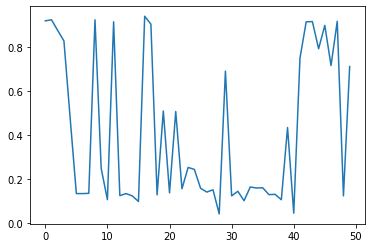

In [ ]:
plt.plot([t.value for t in study.trials])

In [ ]:
optuna.visualization.plot_contour(study)

[W 2022-11-10 11:14:49,555] Param units3 unique value length is less than 2.
[W 2022-11-10 11:14:49,557] Param units4 unique value length is less than 2.
[W 2022-11-10 11:14:49,564] Param units3 unique value length is less than 2.
[W 2022-11-10 11:14:49,568] Param units4 unique value length is less than 2.
[W 2022-11-10 11:14:49,573] Param units3 unique value length is less than 2.
[W 2022-11-10 11:14:49,575] Param units4 unique value length is less than 2.
[W 2022-11-10 11:14:49,580] Param units3 unique value length is less than 2.
[W 2022-11-10 11:14:49,585] Param units4 unique value length is less than 2.
[W 2022-11-10 11:14:49,589] Param units3 unique value length is less than 2.
[W 2022-11-10 11:14:49,591] Param units4 unique value length is less than 2.
[W 2022-11-10 11:14:49,595] Param units3 unique value length is less than 2.
[W 2022-11-10 11:14:49,599] Param units4 unique value length is less than 2.
[W 2022-11-10 11:14:49,602] Param units3 unique value length is less than 2.

In [ ]:
optuna.visualization.plot_param_importances(study)

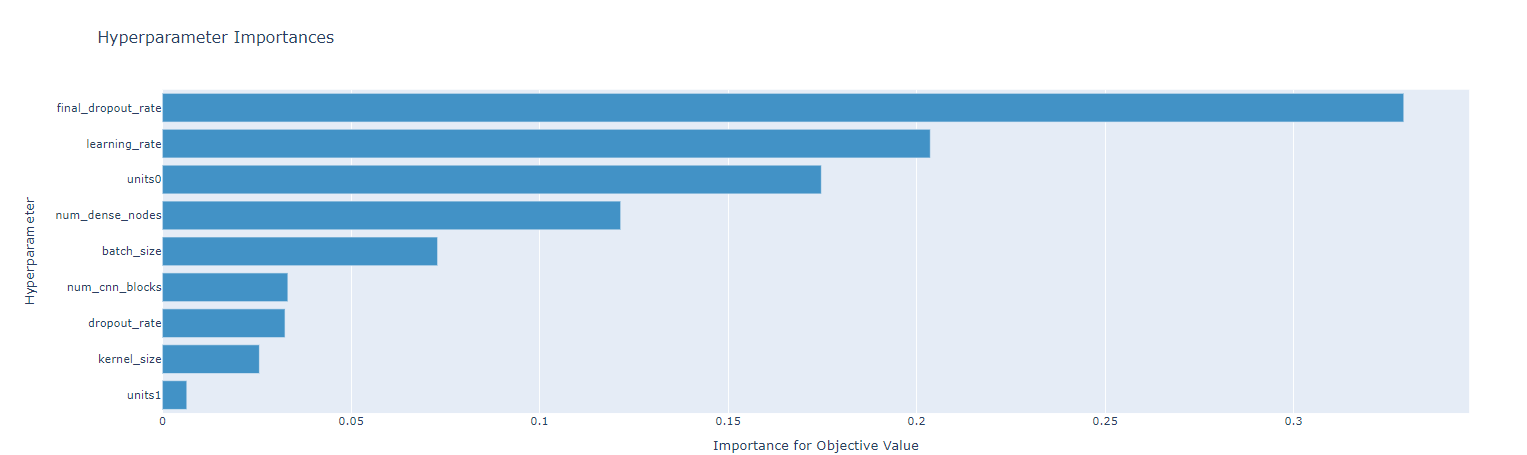

In [ ]:
optuna.visualization.plot_optimization_history(study)

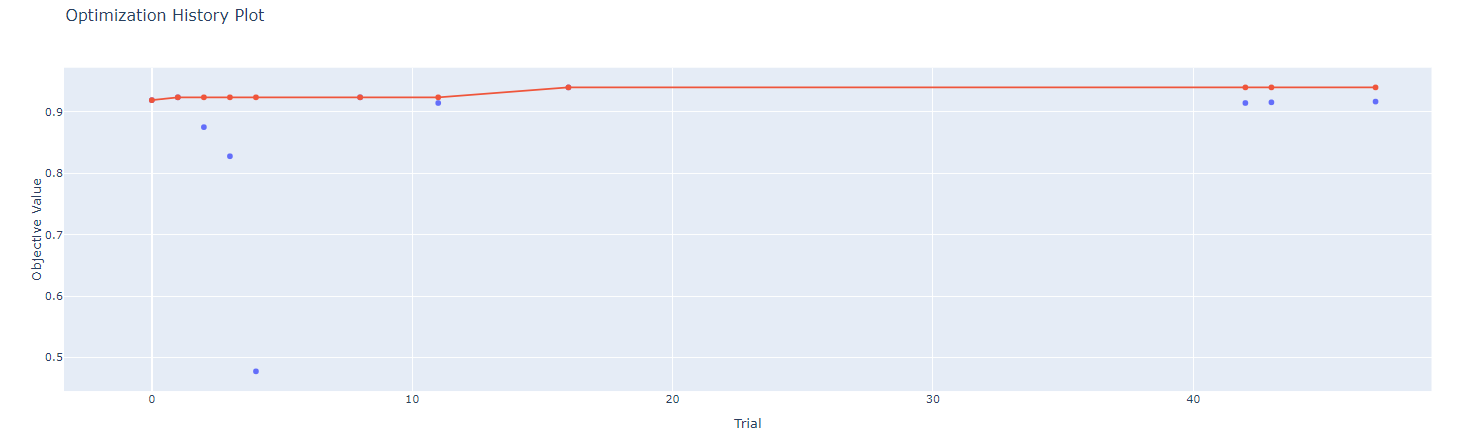

In [ ]:
optuna.visualization.plot_intermediate_values(study)

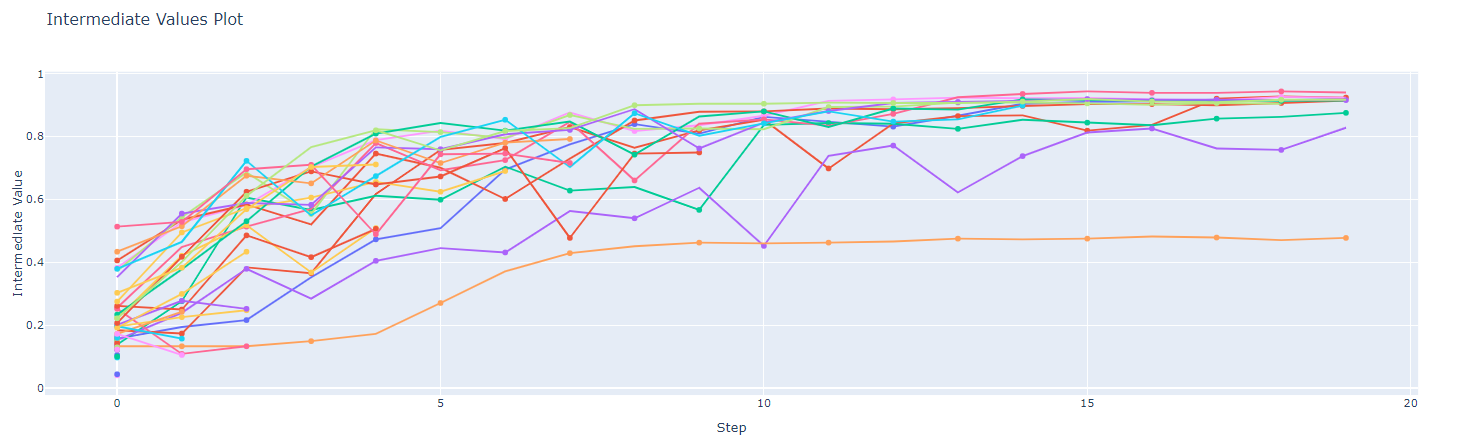

In [ ]:
optuna.visualization.plot_contour(study, params=["dropout_rate","num_cnn_blocks","final_dropout_rate","learning_rate"])

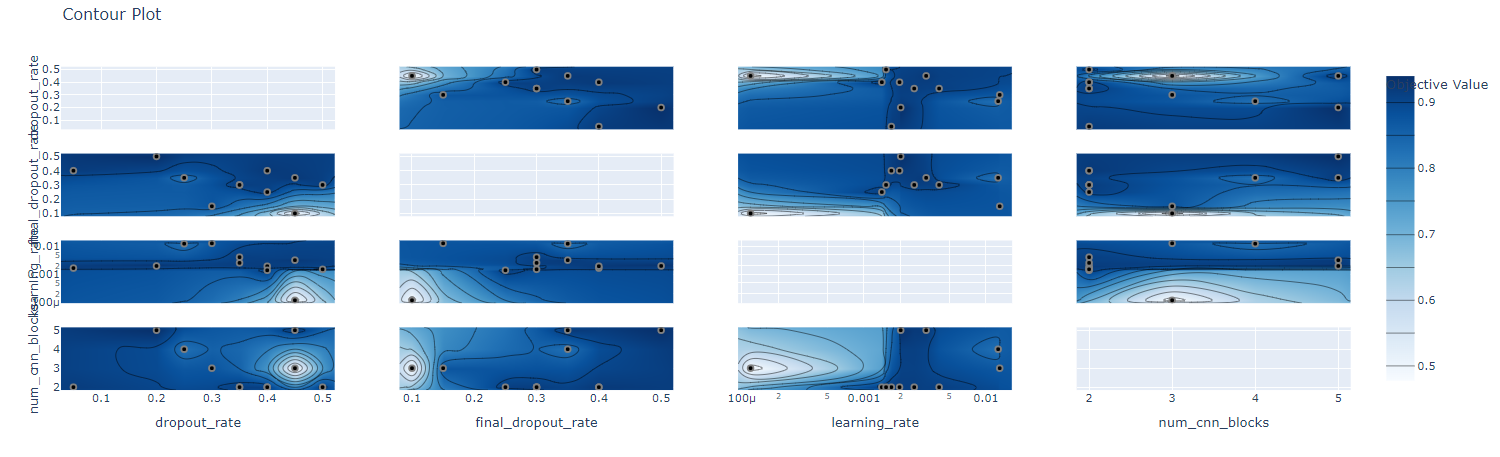

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

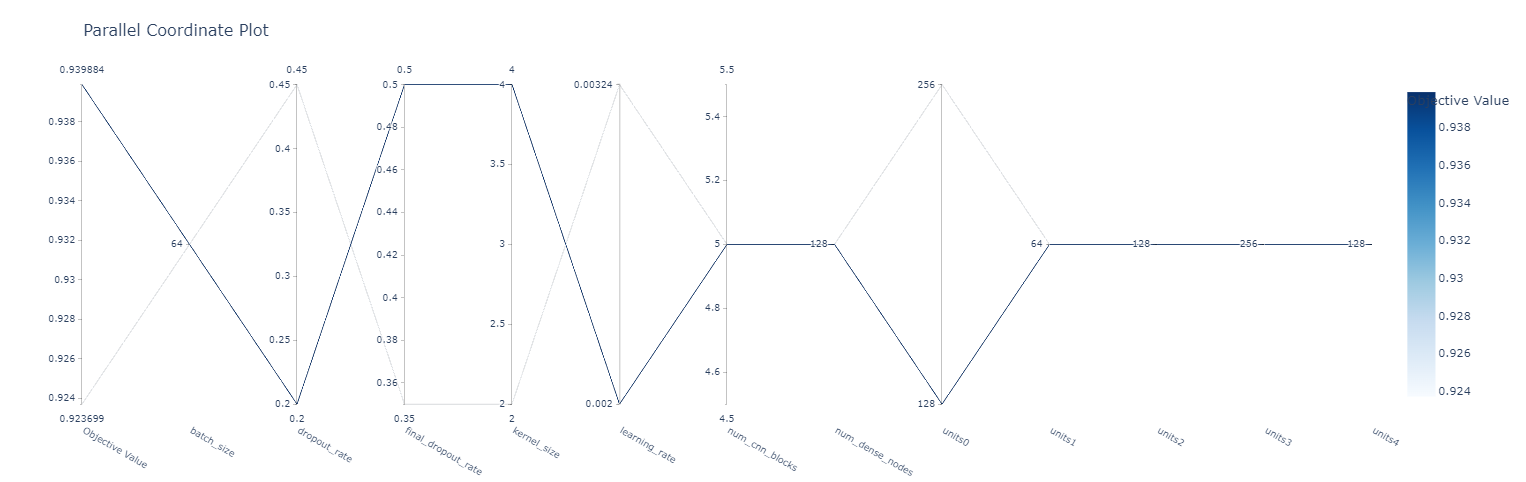

In [ ]:
optuna.visualization.plot_slice(study)

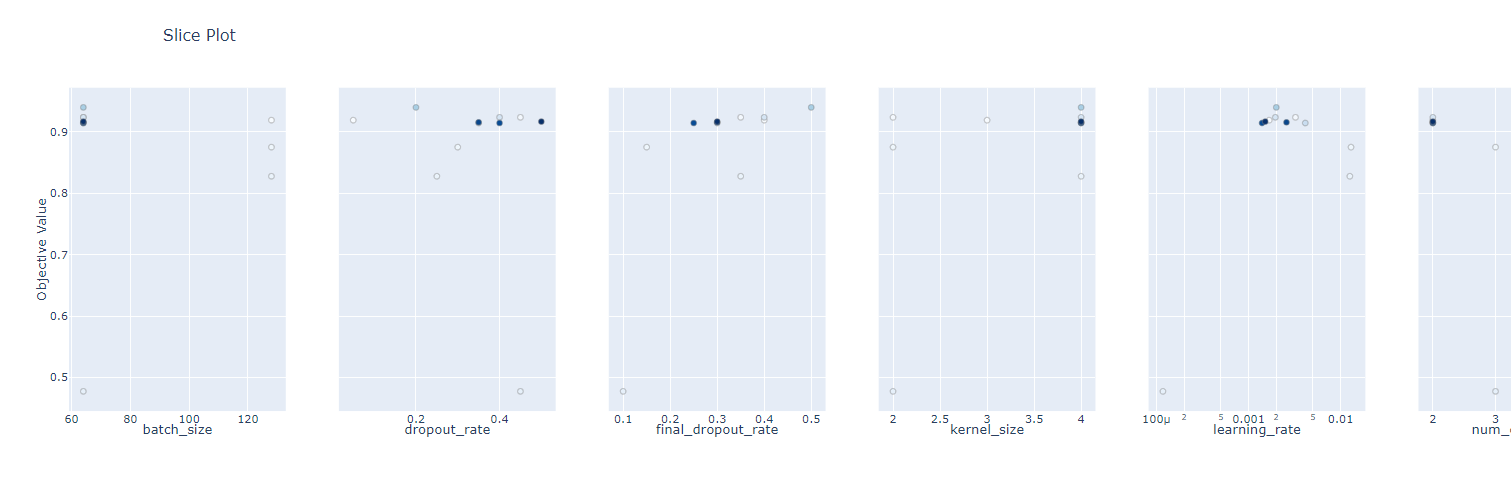

<a name="COMPILE BEST MODEL"></a>

#**6. COMPILE BEST MODEL**

* Optuna gives us the best parameters for the defined model in the light of the parameters I have given.
* Subsequently I plot training graphs and confusion matrix for test dataset.

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = 4, padding = 'same', activation = 'relu', input_shape = (64, 64, 3)))
model.add(Conv2D(filters = 128 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.BatchNormalization())


model.add(Conv2D(filters = 64 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 256 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters = 128 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128 , kernel_size = 4, padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       6272      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       262272    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        131136    
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        6

<a name="VISUALIZE ARCHITECTURE"></a>

##**6.2. VISUALIZE ARCHITECTURE**

In [ ]:
!pip install visualkeras

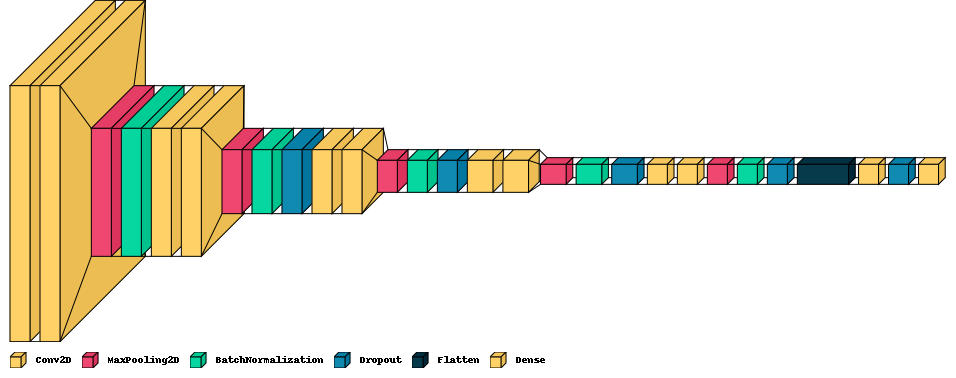

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True, to_file='model_architecture.png')

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ ReduceLROnPlateau(monitor='val_loss', 
                                patience=4, 
                                cooldown=1),
              EarlyStopping(monitor='val_loss', 
                            min_delta=1e-4, 
                            patience=5)]

In [ ]:
hist = model.fit(X_train, y_train, epochs = 100, batch_size = 64, callbacks = callbacks, validation_data = (X_eval , y_eval))

Epoch 1/100
110/110 [==============================] - 19s 163ms/step - loss: 2.4373 - accuracy: 0.3179 - val_loss: 3.1899 - val_accuracy: 0.2000 - lr: 0.0020
Epoch 2/100
110/110 [==============================] - 18s 163ms/step - loss: 1.8570 - accuracy: 0.4256 - val_loss: 1.7975 - val_accuracy: 0.4035 - lr: 0.0020
Epoch 3/100
110/110 [==============================] - 18s 166ms/step - loss: 1.3587 - accuracy: 0.5591 - val_loss: 1.9461 - val_accuracy: 0.3237 - lr: 0.0020
Epoch 4/100
110/110 [==============================] - 18s 164ms/step - loss: 1.1191 - accuracy: 0.6263 - val_loss: 1.4259 - val_accuracy: 0.4879 - lr: 0.0020
Epoch 5/100
110/110 [==============================] - 18s 162ms/step - loss: 0.8720 - accuracy: 0.7124 - val_loss: 1.1351 - val_accuracy: 0.6150 - lr: 0.0020
Epoch 6/100
110/110 [==============================] - 18s 162ms/step - loss: 0.7434 - accuracy: 0.7549 - val_loss: 1.4121 - val_accuracy: 0.6185 - lr: 0.0020
Epoch 7/100
110/110 [=========================

<a name="TEST THE MODEL"></a>

##**6.3. TEST THE MODEL**

In [ ]:
score = model.evaluate(x = X_test, y = y_test, verbose = 0)
print('Accuracy for test images:', round(score[1]*100, 3), '%')
score = model.evaluate(x = X_eval, y = y_eval, verbose = 0)
print('Accuracy for evaluation images:', round(score[1]*100, 3), '%')

Accuracy for test images: 94.508 %
Accuracy for evaluation images: 94.798 %


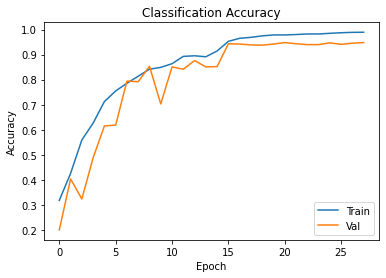

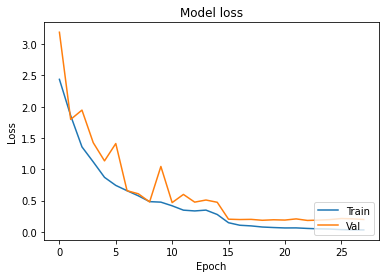

In [ ]:
epochs = range(len(hist.history["accuracy"]))

plt.plot(epochs, hist.history['accuracy'])
plt.plot(epochs, hist.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Classification Accuracy")
plt.show()

# Plot training & validation loss values
plt.plot(epochs,hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.savefig("Model loss")
plt.show()

<a name="CONFUSION MATRIX"></a>

##**6.4. CONFUSION MATRIX** 



28/28 [==============================] - 1s 26ms/step


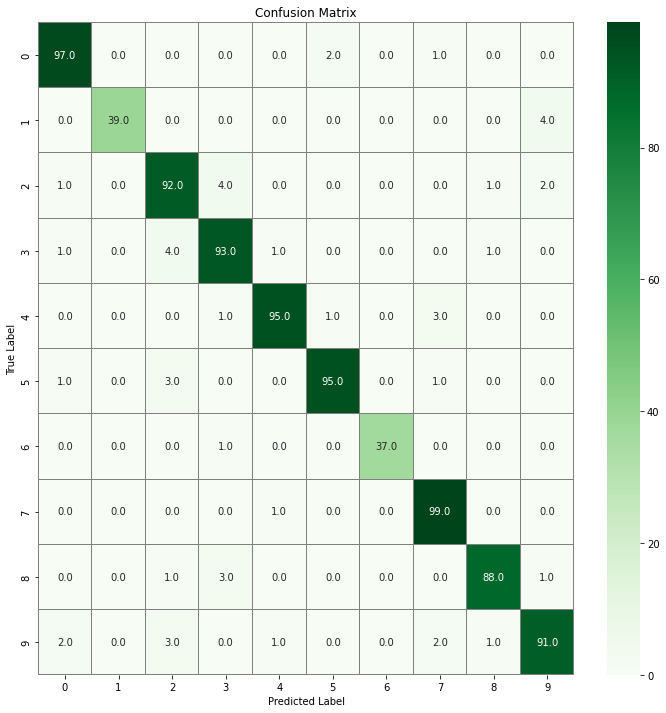

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("UrbanSound_CNN_94.5.h5")

<a name="PREDICTION with TEST DATA"></a>
#**7. PREDICTION with TEST DATA**

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/Urban_Sound/UrbanSound_CNN_94.5.h5")

In [ ]:
class_names = ["Air Conditioner", "Car Horn", "Children Playing", "Dog Bark", "Drilling", "Engine Idling", "Gun Shot","Jackhammer", "Siren", "Street Music"]

In [ ]:
from keras.preprocessing import image
from keras.utils import load_img, img_to_array


In [ ]:
image = load_img("/content/drive/MyDrive/Urban_Sound/images/2/99500-2-0-2.png")

image = img_to_array(image)
image = image.astype('float32') / 255.0
image = cv2.resize(image, (64, 64))
image = np.expand_dims(image, axis=0)
image.shape


(1, 64, 64, 3)

In [ ]:
result = model.predict(image)
result

1/1 [==============================] - 7s 7s/step


array([[8.3701801e-05, 2.9823968e-05, 9.0731561e-01, 2.4077526e-04,
        1.3974402e-05, 3.7198566e-05, 1.2019134e-05, 7.2775811e-06,
        1.8930559e-03, 9.0366453e-02]], dtype=float32)

In [ ]:
class_names[np.argmax(result)]

'Children Playing'